In [33]:
import pandas as pd 

In [34]:
df = pd.read_csv('Mall.csv')

In [35]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [36]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [37]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
df['Genre'] = le.fit_transform(df['Genre'])

In [41]:
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
# df['Annual Income (k$)'] = scaler.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)'] = scaler.fit_transform(df[['Spending Score (1-100)']])

In [45]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,-0.434801
1,2,1,21,15,1.195704
2,3,0,20,16,-1.715913
3,4,0,23,16,1.040418
4,5,0,31,17,-0.395980


In [14]:
# df['Spending Score (1-100)'] = scaler.fit_transform(df[['Spending Score (1-100)']])

In [15]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,-1.738999,-0.434801
1,2,1,21,-1.738999,1.195704
2,3,0,20,-1.700830,-1.715913
3,4,0,23,-1.700830,1.040418
4,5,0,31,-1.662660,-0.395980


In [16]:
df = df.drop(['CustomerID'],axis=1)

In [17]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,-1.738999,-0.434801
1,1,21,-1.738999,1.195704
2,0,20,-1.700830,-1.715913
3,0,23,-1.700830,1.040418
4,0,31,-1.662660,-0.395980


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

In [19]:
model = BaggingRegressor()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(['Annual Income (k$)'],axis=1)

In [22]:
y = df['Annual Income (k$)']

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [24]:
model.fit(X_train,y_train)

BaggingRegressor()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score , median_absolute_error , r2_score

In [27]:
print('MEA:',median_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

MEA: 0.43131454964102767
R2 Score: 0.25361383296729834


In [28]:
import matplotlib.pyplot as plot

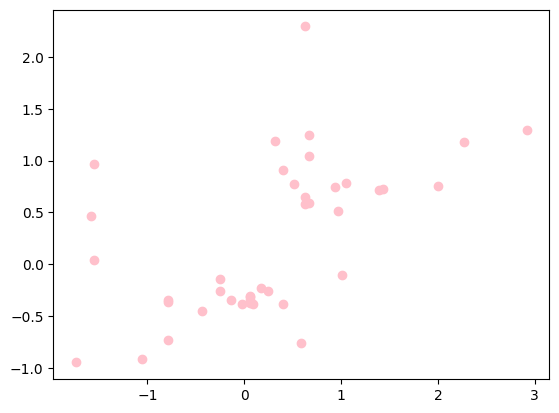

In [29]:
plot.scatter(y_test,y_pred,color='pink')
plot.show()